# 단순 선형회귀

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 아버지와 아들의 키 - Galton

In [2]:
df = pd.read_csv('http://www.randomservices.org/random/data/Galton.txt', sep = '\t')
df

,Family,Father,Mother,Gender,Height,Kids
0,1,78.5,67.0,M,73.2,4
1,1,78.5,67.0,F,69.2,4
2,1,78.5,67.0,F,69.0,4
3,1,78.5,67.0,F,69.0,4
4,2,75.5,66.5,M,73.5,4
...,...,...,...,...,...,...
893,136A,68.5,65.0,M,68.5,8
894,136A,68.5,65.0,M,67.7,8
895,136A,68.5,65.0,F,64.0,8
896,136A,68.5,65.0,F,63.5,8


* 아버지와 아들의 키만 발췌

In [10]:
# df1 = df[df['Gender'] == 'M']
# df1[['Father', 'Height']]

# df.loc[df['Gender'] == 'M', ['Father', 'Height']]

df = df[df['Gender'] == 'M'][['Father', 'Height']]
df.rename(columns = {'Height':'Son'}, inplace=True)
df.head()

,Father,Son
0,78.5,73.2
4,75.5,73.5
5,75.5,72.5
8,75.0,71.0
10,75.0,70.5


In [11]:
# inch를 cm로

df = df * 2.54
df.head()

,Father,Son
0,199.39,185.928
4,191.77,186.690
5,191.77,184.150
8,190.50,180.340
10,190.50,179.070


* 산점도 그리기

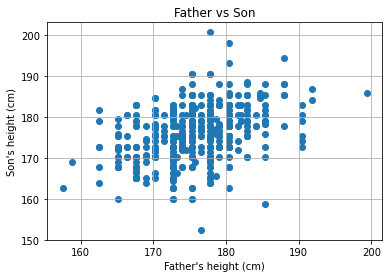

In [12]:
plt.scatter(df.Father, df.Son)
plt.grid()                              # 격자표시
plt.xlabel("Father's height (cm)")
plt.ylabel("Son's height (cm)")
plt.title('Father vs Son')
plt.show()

* 회귀선 구하기

In [13]:
weight, bias = np.polyfit(df.Father, df.Son, 1)   # 1차식으로 그리겠다
weight, bias

(0.44774791760302574, 97.17763700739343)

In [14]:
# 두 점을 구해서 회귀선을 구하는 방식

xs = np.array([156, 201])
ys = xs * weight + bias
ys

array([167.02631215, 187.17496845])

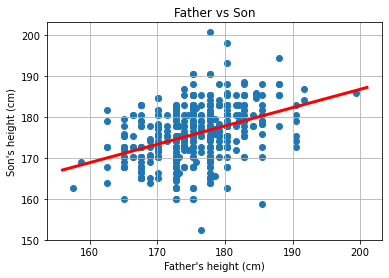

In [15]:
plt.scatter(df.Father, df.Son)
plt.plot(xs, ys, 'r-', lw=3)
plt.grid()                              # 격자표시
plt.xlabel("Father's height (cm)")
plt.ylabel("Son's height (cm)")
plt.title('Father vs Son')
plt.show()

* Scikit_Learn으로 회귀식 구하기

In [16]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [18]:
lr.fit(df.Father.values.reshape(-1, 1), df.Son.values) # X값에는 2차원 데이터가 들어가야 한다

LinearRegression()

In [20]:
# 기울기, weight
lr.coef_

array([0.44774792])

In [21]:
# 절편, bias
lr.intercept_

97.17763700739347

In [22]:
weight, bias

# np.polyfit을 통해서 구한 값과 같음을 알 수 있다.

(0.44774791760302574, 97.17763700739343)

In [23]:
# 잔차 제곱의 합(RSS : Residual Sum of Square)
lr._residues

17556.59951549399

In [24]:
# R squared - 성능 평가 요소
lr.score(df.Father.values.reshape(-1, 1), df.Son.values)

0.1531292747830697

# 로지스틱 회귀

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

* Sigmoid 함수

In [2]:
def sigmoid(x, a=1, b=0):
    return (1 / (1 + np.exp(-a*(x-b))))

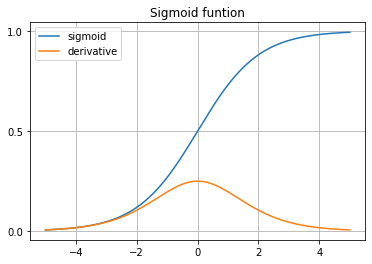

In [4]:
xs = np.linspace(-5, 5, 1001)
ys = sigmoid(xs)
plt.plot(xs, ys, label = 'sigmoid')
plt.plot(xs, ys*(1-ys), label = 'derivative')
plt.title('Sigmoid funtion')
plt.yticks([0, 0.5, 1])
plt.grid()
plt.legend()
plt.show()

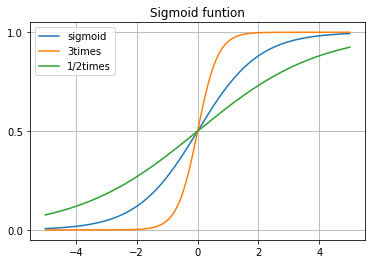

In [7]:
xs = np.linspace(-5, 5, 1001)
ys = sigmoid(xs)
y3 = sigmoid(xs, a=3)
y_half = sigmoid(xs, a=0.5)
plt.plot(xs, ys, label = 'sigmoid')
plt.plot(xs, y3, label = '3times')
plt.plot(xs, y_half, label = '1/2times')
plt.title('Sigmoid funtion')
plt.yticks([0, 0.5, 1])
plt.grid()
plt.legend()
plt.show()

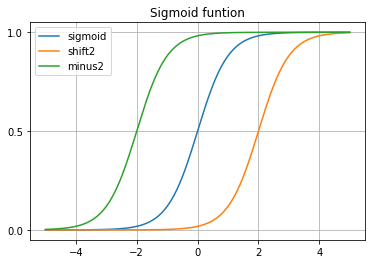

In [8]:
xs = np.linspace(-5, 5, 1001)
ys = sigmoid(xs, a=2)
y_shift2 = sigmoid(xs, a=2, b=2)
y_minus2 = sigmoid(xs, a=2, b=-2)
plt.plot(xs, ys, label = 'sigmoid')
plt.plot(xs, y_shift2, label = 'shift2')
plt.plot(xs, y_minus2, label = 'minus2')
plt.title('Sigmoid funtion')
plt.yticks([0, 0.5, 1])
plt.grid()
plt.legend()
plt.show()

* 이진 분류

In [31]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
cancer.data.shape

(569, 30)

In [33]:
# 로지스틱 회귀를 사용하려면 정규화해야한다

from sklearn.preprocessing import StandardScaler
cancer_std = StandardScaler().fit_transform(cancer.data)

In [41]:
# Train/Test dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    cancer_std, cancer.target, stratify = cancer.target, random_state=2021
)

In [42]:
# Logistic 회귀
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state = 2021)
lr.fit(X_train, y_train)

LogisticRegression(random_state=2021)

In [43]:
lr.coef_

array([[-0.38562354, -0.34262207, -0.36413343, -0.41168842, -0.125392  ,
         0.53427855, -0.57868168, -0.85019026,  0.08724313,  0.2574702 ,
        -1.06464785,  0.20019118, -0.74749809, -0.84878727, -0.27163866,
         0.58431601,  0.06165371, -0.36110527,  0.42706156,  0.66294691,
        -1.01272202, -1.1987033 , -0.86629684, -0.96940075, -0.66452609,
         0.00882768, -0.84903123, -0.74604926, -0.72522438, -0.52639092]])

In [44]:
lr.intercept_

array([0.29535933])

In [45]:
X_test[0]

array([ 1.74177621,  0.8704049 ,  1.66535961,  1.73237389, -0.39712318,
        0.51091323,  0.72443042,  0.9778719 ,  1.03460934, -0.89416933,
        1.27198647,  0.53005435,  0.83558235,  1.04580552, -0.34167349,
        0.52211232,  0.34570453,  0.1449932 ,  0.72982504,  0.23303919,
        1.64647389,  0.96285899,  1.45470423,  1.52835897, -0.58602424,
        0.63381753,  0.66019449,  0.65008095,  1.27520633, -0.01473048])

In [46]:
lr.predict_proba(X_test[0].reshape(1, -1))

array([[9.99994552e-01, 5.44815673e-06]])

* 직접 계산 : X_test[0]가 1이 될 확률

In [50]:
val = np.dot(lr.coef_, X_test[0]) + lr.intercept_
val


array([-12.12022777])

In [51]:
sigmoid(val)

array([5.44815673e-06])